In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/BDAMLproject/Cohn-Kanade/
%cp -av dataset_resnet /content/
%cd /content/dataset_resnet

/content/gdrive/MyDrive/BDAMLproject/Cohn-Kanade
'dataset_resnet' -> '/content/dataset_resnet'
'dataset_resnet/test_dataset.npy' -> '/content/dataset_resnet/test_dataset.npy'
'dataset_resnet/train_labels.npy' -> '/content/dataset_resnet/train_labels.npy'
'dataset_resnet/test_labels.npy' -> '/content/dataset_resnet/test_labels.npy'
'dataset_resnet/train_dataset.npy' -> '/content/dataset_resnet/train_dataset.npy'
/content/dataset_resnet


In [3]:
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

In [11]:
dataset_train = np.load("train_dataset.npy")
labels_train = np.load("train_labels.npy")

dataset_test = np.load("test_dataset.npy")
labels_test = np.load("test_labels.npy")

dataset_test = cv2.normalize(dataset_test, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F).reshape((dataset_test.shape[0], dataset_test.shape[1], dataset_test.shape[2], 1))
dataset_train = cv2.normalize(dataset_train, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F).reshape((dataset_train.shape[0], dataset_train.shape[1], dataset_train.shape[2], 1))

In [12]:
dataset_train.shape

(1071, 224, 224, 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

from tensorflow.keras.optimizers import Adam

In [19]:
model = Sequential()

model.add(Conv2D(input_shape=(224,224,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=64,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=7, activation="softmax"))

In [20]:
model.compile(optimizer=Adam(0.001), loss= "categorical_crossentropy", metrics=["accuracy"])

In [22]:
model.fit(dataset_train, labels_train, batch_size=128, epochs=100)

Epoch 1/100
9/9 [==============================] - 53s 3s/step - loss: 1.9458 - accuracy: 0.1438
Epoch 2/100
9/9 [==============================] - 12s 1s/step - loss: 1.9461 - accuracy: 0.1466
Epoch 3/100
9/9 [==============================] - 12s 1s/step - loss: 1.9459 - accuracy: 0.1382
Epoch 4/100
9/9 [==============================] - 12s 1s/step - loss: 1.9459 - accuracy: 0.1326
Epoch 5/100
9/9 [==============================] - 12s 1s/step - loss: 1.9461 - accuracy: 0.1345
Epoch 6/100
9/9 [==============================] - 12s 1s/step - loss: 1.9459 - accuracy: 0.1466
Epoch 7/100
9/9 [==============================] - 12s 1s/step - loss: 1.9460 - accuracy: 0.1541
Epoch 8/100
9/9 [==============================] - 12s 1s/step - loss: 1.9460 - accuracy: 0.1578
Epoch 9/100
9/9 [==============================] - 12s 1s/step - loss: 1.9460 - accuracy: 0.1447
Epoch 10/100
9/9 [==============================] - 12s 1s/step - loss: 1.9459 - accuracy: 0.1503
Epoch 11/100
9/9 [===========

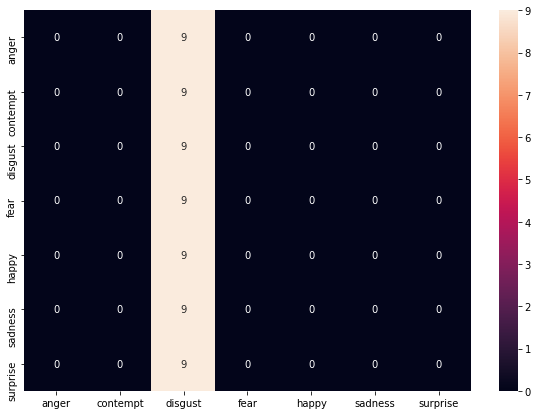

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

prediction = model.predict(dataset_test)
cm = confusion_matrix(labels_test.argmax(axis=1), prediction.argmax(axis=1))

categories = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, xticklabels=categories, yticklabels=categories)